<a href="https://colab.research.google.com/github/anadiedrichs/rl-ai/blob/master/2-LAB_2_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio #2 de Aprendizaje por refuerzo - Inteligencia Artificial - DISI 2019


**Realizado por: Ing. Ana Laura Diedrichs**

Consultas: lunes 19 hs en sala consulta de sistemas.

Contacto por otros horarios de consulta o dudas: 
* Email ana.diedrichs@frm.utn.edu.ar
* Telegram  @anadiedrichs
* en el grupo de la materia por dudas generales

## Objetivos del laboratorio:

* Mediante un problema de juguete evaluar las diferencias entre el comportamiento aleatorio de un agente y su comportamiento con aprendizaje por refuerzo
* Comprensión del funcionamiento de Q-learning
* Evaluación de hiperparámetros alfa, gamma y epsilon en Q-learning.
* Ser una entrada en calor o training del uso del entorno colab.research.google.com

## Pre-requisitos o pre-condiciones
* Tener una cuenta google (gmail)
* Tener instalado el navegador google chrome 
* Contar con conectividad a internet 



# Entrega y uso de este laboratorio

**USO**

* Antes que cualquier cosa,  cree una copia de este notebook: Click en *File*, luego *Save a Copy in Drive*
* Renombre el archivo con el siguiente formato: APELLIDO_LEGAJO_titulonotebook.ipynb 
Ejemplo: DIEDRICHS_99999_Cab-taxi-problem.ipynb
* Use el notebook, complete las actividades del final. 
* Este laboratorio es una actividad individual.


**ENTREGA**

* Una vez finalizado el laboratorio, complete [el formulario de entrega](https://forms.gle/AqdeVPA38chsJqR99)  indicando:
 * Apellido
 * Nombre
 * Nro Legajo
 * Turno (tarde o noche)
 * link de su notebook. El mismo se obtiene si realiza click en *Share* (esquina superior derecha) y luego en *Get shareable link* 
 
 
 No se aceptarán otras formas de entrega distintas a la mencionada.
 
 
 Fecha límite de entrega: se indicará en clase o por la lista de correos. Última semana de clases es la entrega.

# Introducción

Vamos a trabajar utilizando este notebook y una librería llamada OpenAI (https://gym.openai.com/) y realizaremos simulaciones de aprendizaje por refuerzo.

Ejecute los siguientes dos bloques de código (click en la flechita a la izquierda del bloque de código).

Primero instalamos las librerías necesarias necesarias.

In [0]:
!pip install cmake 'gym' scipy

In [0]:
# este es un comentario en el código
import gym # importa librería gym
import pandas as pd # carga la librería pandas y la llamaremos como pd
import matplotlib.pyplot as plt # carga la librería pyplot y la llamaremos de forma abreviada como plt



## Descripción del ambiente


El siguiente bloque de código crea el ambiente **Taxi**, del inglés *environment* y su abreviatura *env*.


In [0]:
env = gym.make("Taxi-v2").env # crea / instancia ambiente llamado Taxi-v2

env.render() # nos muestra una imagen de como luce el ambiente.

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




* El trabajo del agente es recoger un pasajero de una ubicación y llevarlo a un destino. 
* Se reciben +20 puntos por llevarlo al destino indicado y se pierte un punto por cada paso realizado (*time-step*)
* Se penaliza con 10 puntos (-10) por intentar recoger un pasajero o dejarlo en un destino que no era el indicado.
* El cuadradito relleno de amarillo representa el taxi cuando no lleva pasajeros y se pone verde cuando lleva un pasajero.
* El *pipe* (símbolo | ) representa una pared o muro, la misma no puede ser atravesada por el taxi.
* Hay cuatro (4) ubicaciones idenficadas con distintas letras. 

R, G, Y, B  son posibles destino de recogida y llegada/destino de pasajeros. 

La letra en azul representa una ubicación actual para recoger un pasajero, y la letra lila o púrpura representa el destino del pasajero.



Veamos que otras cosas podemos hacer con *environment*

In [0]:
env.reset() # me "resetea" el ambiente a uno nuevo, uno aleatorio
env.render() # muestra la imagen del ambiente

print("Action Space {}".format(env.action_space)) # cuántas acciones puede tomar el agente
print("State Space {}".format(env.observation_space)) # cuántos espacios o estados s puede tomar el agente


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


Como nos muestra la salida del *print* tenemos un espacio de acción de tamaño 6 (seis) y un espacio de estados de tamaño 500. 

Los 500 estados posibles corresponden a la codificación que incluye: ubicación del taxi, ubicación del pasajero y ubicación destino del pasajero. (ver actividad nro 2))

Nuestro algoritmo de aprendizaje por refuerzo (RL) no necesita más que estas dos cosas: el conjunto de acciones posibles y el conjunto de estados posibles. 

Necesitamos identificar cada estado de forma unívoca, asignándole un número único al estado (un ID) y que el algortimo RL elija algunas de las acciones posibles a tomar, que están etiquetadas desde el 0 cero al 5 cinco, donde:


* 0 = sur
* 1 = nore
* 2 = este
* 3 = oeste
* 4 = *pickup* o recoger pasajero
* 5 = *dropoff* o dejar en su destino al pasajero


En cada unidad de tiempo discreta de nuestro simulador, según una acción ejecutada sobre el ambiente, el mismo regresa los siguientes elementos:

In [0]:
env.step(3)

(433, -1, False, {'prob': 1.0})

* **Observación**  (objecto): el estado del ambiente o un objeto específico del ambiente que representa la observación del mismo.
* **Recompensa** o Reward (float): es la recompensa alcanzada por la acción previa.

* **Done** (boolean): si es momento de "resetear el ambiente". La mayoría de las tareas en varios ambientes si el valor done = True indica que el episodio ha terminado (perdiste una vida en un video juego, por ejemplo) o se alcanzó un objetivo (dejamos pasajero en su destino, para este ejemplo).
* **Info** (dict): podemos ignorar este atributo, brinda información de diagnóstico para debugging. No hay que usar nada de esto para aprendizaje/entrenamiento.

#### [ACTIVIDAD] Detalle cuáles son los valores de recompensa para este problema

Vea la [info del entorno](https://gym.openai.com/envs/Taxi-v2/)

RESPUESTA


Veamos como está codificado el estado y el ambiente del Taxi.

In [0]:
state = env.encode(3, 1, 1, 0) # (fila de posición del taxi, columna de posición del taxi, índice del pasajero, índice del destino)
print("State:", state)

env.s = state
env.render()

State: 324
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


#### **[ACTIVIDAD]** Modifique la primer línea del siguiente script para ver dónde es la posición (3,4) del mapa y la (0,0)


In [0]:
state = env.encode(0, 0, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state) # muestra el número de estado, una codificación.

env.s = state
env.render() # nos muestra una representación gráfica del estado.

State: 8
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


**[ACTIVIDAD]** Modifique el siguiente script, verifique cuáles son los valores posibles de los índices de pasajero y destino. ¿Qué representan.?

In [0]:
state = env.encode(0, 0, 2, 0)# (fila de posición del taxi, columna de posición del taxi, índice del pasajero, índice del destino)
print("State:", state)
env.s = state
env.render()

State: 8
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


## Comportamiento del agente aleatorio (random search)

Ejecute el siguiente bloque de código

In [0]:
env.s = 329  # estado desde el cual arranca. 

#### **[ACTIVIDAD]**  Visualice el estado. Reutilice código anterior.

In [0]:
# coloque aquí el código y ejecute

Inicializamos variables


In [0]:
epochs = 0 # contador de iteraciones
penalties, reward = 0, 0 # penalidades y recompensas
frames = [] # para la animación 
rewards = [] # guardamos la recompensa obtenida por cada acción
done = False

El siguiente código muestra la ejecución de un agente de búsqueda aleatoria.




In [0]:
# mientras no llegue al objetivo
while not done:
    action = env.action_space.sample() # elige la próxima acción de forma aleatoria
    state, reward, done, info = env.step(action) # se ejecuta la acción sobre el ambiente

    if reward == -10:  # si lo penalizan, suma una penalización.
        penalties += 1
    
    rewards.append({'epoch':epochs,'reward':reward}) #guarda el nro de iteración y valor de recompensa obtenida.
    
    # Guarda información de cada frame en un diccionario, para posterior animación
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1 # incrementa número de iteración
    
    
print("Cuantos pasos o epochs o time-steps corrió: {}".format(epochs))
print("Penalidades (cuántas veces fue penalizado): {}".format(penalties))

Cuantos pasos o epochs o time-steps corrió: 1826
Penalidades (cuántas veces fue penalizado): 575


A continuación visualizamos esas recompensas otorgadas por cada episodio de ejecución del agente.

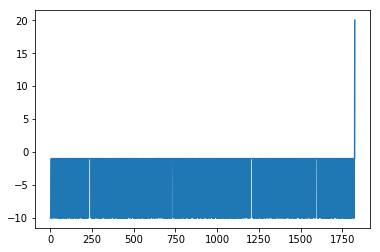

In [0]:
df = pd.DataFrame(rewards)

plt.plot(df['reward'])
# agregue título al gráfico
# agregue etiqueta al eje x y al eje y


#### **[ACTIVIDAD]** 

Agregue título al gráfico anterior y etiqueta a los ejes x e y usando las funciones de matplotlib usando las funciones 

* xlabel("Nombre del eje x")
* ylabel("Nombre del eje y")
* title("Título del gráfico")


El siguiente gráfico muestra la suma acumulada de las recompensas a través del tiempo. Observamos claramente una tendencia negativa, pues el agente ha sido penalizado (recompensa negativa) la mayor parte del tiempo.

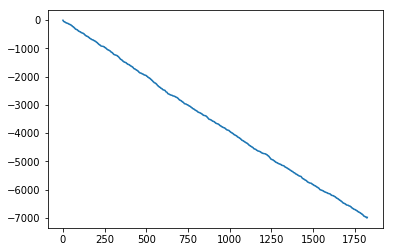

In [0]:
plt.plot(df['reward'].cumsum())

Ejecute el siguiente bloque para observar las acciones del agente y el ambiente

In [0]:
from IPython.display import clear_output
from time import sleep

# función print_frames
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'].getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
#print_frames(frames) # descomente para llamar a la función print_frames o utilice un bloque de código aparte.

Para nada bueno el desempeño del agente. A nuestro agente aleatorio le toma miles de *timesteps* o *epochs* cometiendo muchas acciones erróneas (es penalizado muchas veces) para tan sólo acercar a un pasajero al destino.



## Aprendizaje por refuerzo con Q-learning



Inicializamos tabla Q con ceros.

In [0]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

Entrenamos al agente, es decir, *completamos* la tabla Q con valores que se ajusten a una política.

**Hiperparámetros**

$\alpha$ es el coeficiente de aprendizaje en Q-learning, página 873 del libro

$\gamma$ el factor de descuento 

$\epsilon$ ¿para qué usamos este coeficiente en el código.





Observe las líneas 24 a la 27 y responda la actividad 2) 

## [Algoritmo Q-Learning](https://es.wikipedia.org/wiki/Q-learning)

![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/59db58edf1222b292e40706e503ed5974553606b)

In [0]:
%%time
"""Entrenando el agente"""

import random
from IPython.display import clear_output

# Hiperparámetros
alpha = 0.1 # tasa de aprendizaje en Q-learning
gamma = 0.6 # factor de descuento gamma,
epsilon = 0.1 # probabilidad 
max_iter = 10000 #100001
# para graficar métricas
all_epochs = []
all_penalties = []
rewards = []

for i in range(1, max_iter):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(q_table[state]) 

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        
        next_max = np.max(q_table[next_state])
        
        #new_value =  old_value + alpha * (old_value- reward - gamma * next_max)
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1
            
        rewards.append({'epoch':epochs,'reward':reward})
        
        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 9900
Training finished.

CPU times: user 5.29 s, sys: 203 ms, total: 5.49 s
Wall time: 5.41 s


## Evaluemos el agente



Dada la tabla Q aprendida, la ponemos a prueba en el ambiente.

Política óptima:

$\pi^{*}(s) = arg max_a Q(s,a)$

In [0]:

total_epochs, total_penalties = 0, 0
episodes = 100
rewards3 = []
frames = [] # para la animación

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done: # mientras el taxi no llegue a destino.
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1
        rewards3.append({'epoch':epochs,'reward':reward})
        
        # frames para animacion
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )

    total_penalties += penalties
    total_epochs += epochs

print(f"Resultados luego de  {episodes} episodios:")
print(f"Promedio de timestemps o iteraciones por episodio: {total_epochs / episodes}")
print(f"Promedio de penalidades por episodio: {total_penalties / episodes}")

Ejecute el siguiente bloque de código si desea visualizar las acciones ejecutadas por el agente. 
**Nota**: puede demorar un poco.


In [0]:
# print_frames(frames)

#### [ACTIVIDAD] Grafique la suma acumulada de recompensas a través del tiempo (epochs)

# ACTIVIDADES

## 1) Explique, detalle, como se calcula los 500 estados posibles del problema del *Taxi*. Desglose cada término y valor implicado.

**ESCRIBA AQUI SU RESPUESTA A LA CONSIGNA**



## 2) En el código de Q-learning presentado. 

2.1 Explique que hace las líneas de código entre 24 -27 . Pista: explorar vs explotar.




2.2 ¿Qué pasaría si el valor de $ \epsilon $ fuera 1?



## 3.1) Basado en los resultados anteriores, indique cuál agente funcionó mejor (aleatorio vs Q-learning) y justifique.



**ESCRIBA AQUI SU TEXTO DE RESPUESTA A LA CONSIGNA 

## 3.2) Compare para este entorno el desempeño y funcionamiento de iteración de valores y políticas vs Q-learning. Utilice código del laboratorio anterior. Escriba sus conclusiones, mientras más completas, mejor.

## [ OPCIONAL ] 4) Búsqueda en grilla

Realice una búsqueda en grilla para determinar los mejores valores para alpha, gamma y epsilon, entre los valores siguientes valores.


Valores de alpha a considerar: {0.1, 0.3 ,0.6}

Valores de gamma a considerar:  {0.1,0.5, 0.9}

Valores de epsilon a considerar: {0.1,0.5, 0.9}


* Cree el script para ejecutar este experimento.

* Determine los valores de rendimiento a guardar de cada experimento (recompensa promedio, penalización promedio, etc)

* Utilice la cantidad de bloques de código y texto que crea necesarios



# Referencias

Este laboratorio fue inspirado gracias a las siguientes referencias:

* Open AI Gym (https://gym.openai.com/)
* Taxi environment in Open AI Gym 
 * https://gym.openai.com/envs/Taxi-v2/
 * https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py
* Q-learning from scratch https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
* Q-learning, wikipedia https://es.wikipedia.org/wiki/Q-learning

